<a href="https://colab.research.google.com/github/pedropriori/titanic-desaster/blob/main/Titanic_Desaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas

In [51]:
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

# Pegando informações e lendo os dataframes

In [52]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_all = concat_df(df_train, df_test)

df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

dfs = [df_train, df_test]

print('Number of Training Examples = {}'.format(df_train.shape[0]))
print('Number of Test Examples = {}\n'.format(df_test.shape[0]))
print('Training X Shape = {}'.format(df_train.shape))
print('Training y Shape = {}\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {}'.format(df_test.shape))
print('Test y Shape = {}\n'.format(df_test.shape[0]))
print(df_train.columns)
print(df_test.columns)
print(df_train.info())
print(df_train.describe())
df_train.sample(5)

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S


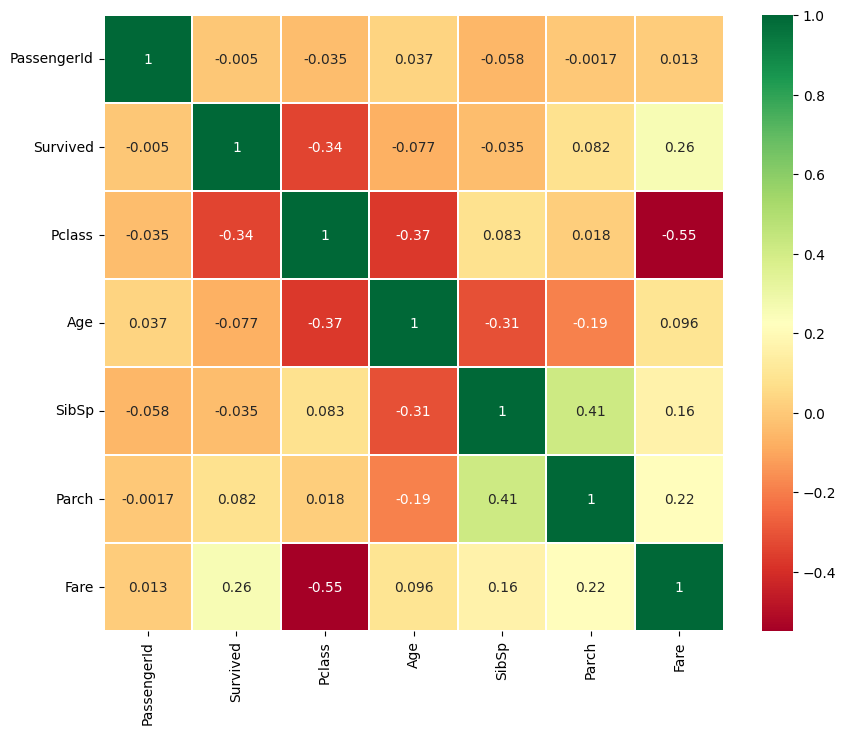

In [53]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [54]:
# Função para analisar cada coluna do dataframe
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

for df in dfs:
    print('{}'.format(df.name))
    display_missing(df)

Training Set
PassengerId column missing values: 0
Survived column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 177
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 0
Cabin column missing values: 687
Embarked column missing values: 2


Test Set
PassengerId column missing values: 0
Pclass column missing values: 0
Name column missing values: 0
Sex column missing values: 0
Age column missing values: 86
SibSp column missing values: 0
Parch column missing values: 0
Ticket column missing values: 0
Fare column missing values: 1
Cabin column missing values: 327
Embarked column missing values: 0




In [55]:
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [56]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

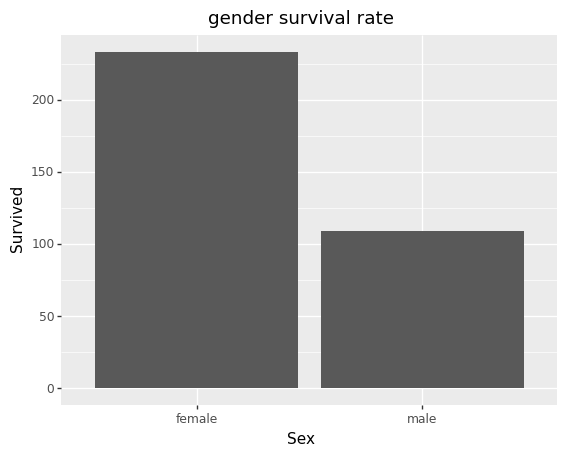

<ggplot: (8752979183523)>

In [57]:
(ggplot(df_train)
 + aes(x='Sex', y='Survived')
 + geom_col()
 + ggtitle('gender survival rate')
)

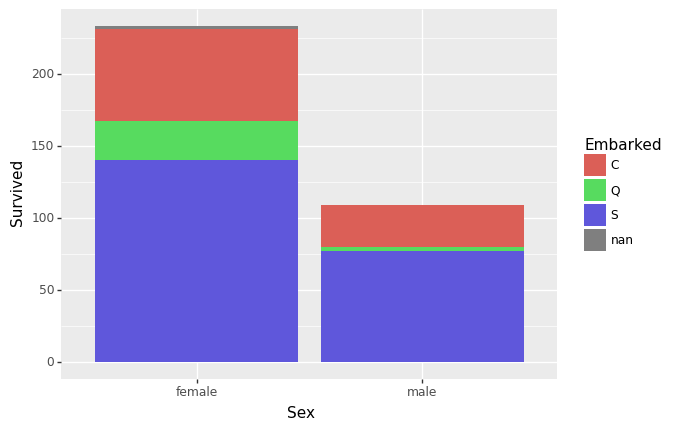

<ggplot: (8752977530382)>

In [58]:
(ggplot(df_train)
 + aes(x='Sex', y='Survived', fill='Embarked')
 + geom_col()
)

In [59]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [60]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [61]:
# Alterando os dados dos números para string
df_train['Pclass'] = df_train['Pclass'].astype('str')

pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


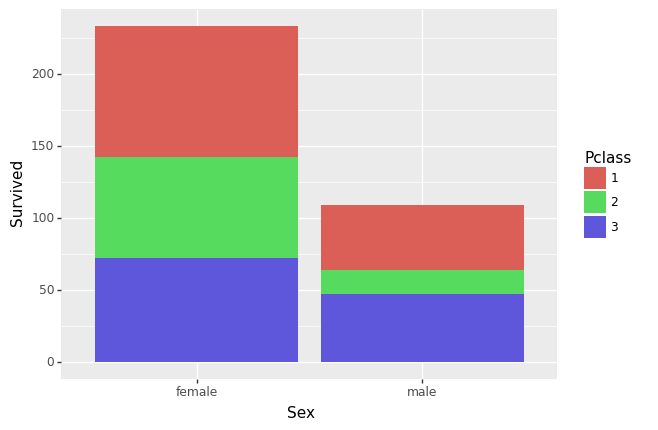

<ggplot: (8752981310071)>

In [62]:
(ggplot(df_train)
 + aes(x='Sex', y='Survived', fill='Pclass')
 + geom_col()
)

In [63]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [64]:
df_train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [65]:
train_dropna_age = df_train['Age'].dropna()

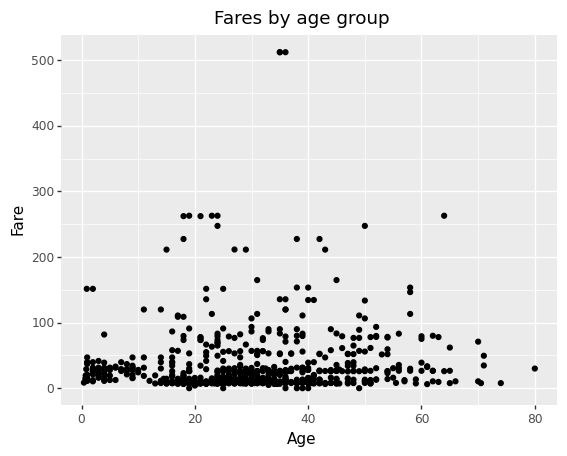

<ggplot: (8752976393304)>

In [66]:
(ggplot(df_train)
 + aes(x='Age', y='Fare')
 + geom_point()
 + ggtitle('Fares by age group')
)

In [67]:
df_train['Survived'] = df_train['Survived'].astype('category')

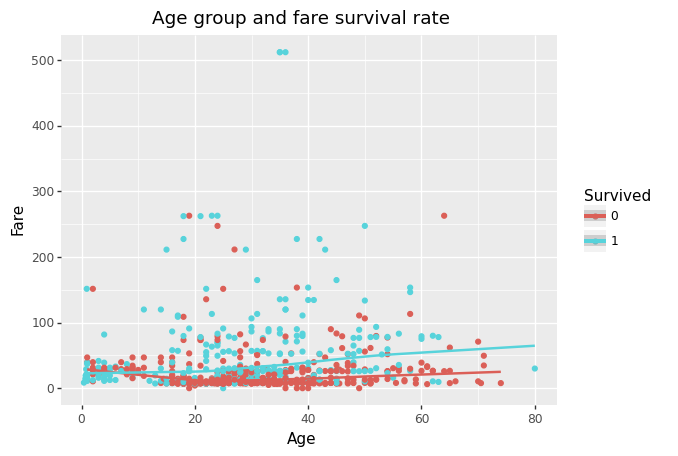

<ggplot: (8752977390202)>

In [68]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + ggtitle('Age group and fare survival rate')
)

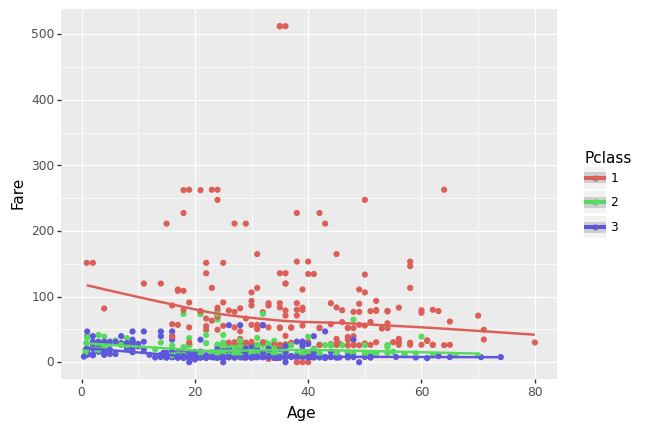

<ggplot: (8752974947494)>

In [69]:
# Procurando correlações entre idade e Pclass
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Pclass')
 + geom_point()
 + stat_smooth()
)

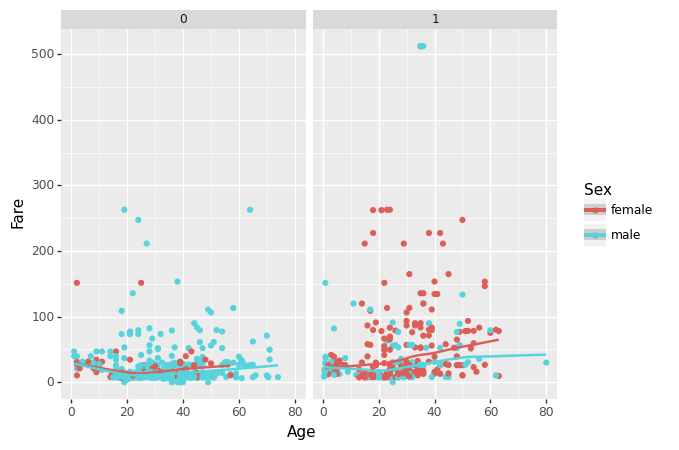

<ggplot: (8752974965169)>

In [70]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Sex')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Survived')
)

In [71]:
df_train['Survived'] = df_train['Survived'].astype('category')

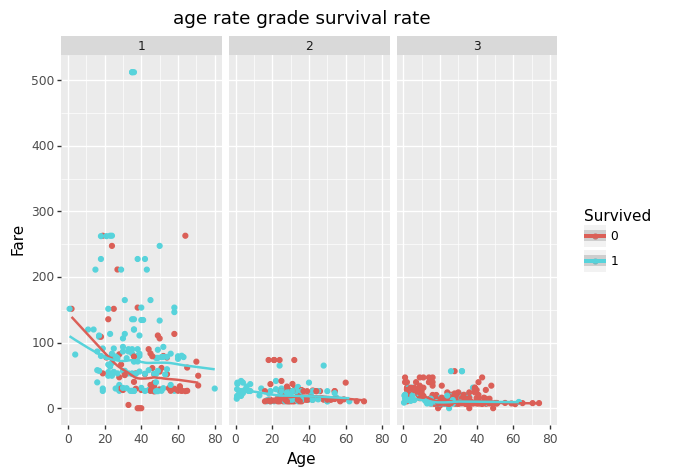

<ggplot: (8752974745573)>

In [72]:
# Procurando coorelação entre idade e sexo da tarifa
(ggplot(df_train)
 + aes(x='Age', y='Fare', color='Survived')
 + geom_point()
 + stat_smooth()
 + facet_wrap('~Pclass')
 + ggtitle('age rate grade survival rate')
)

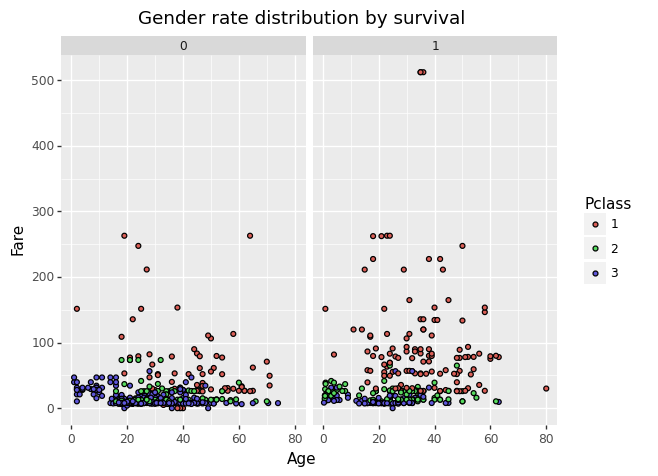

<ggplot: (8752976423399)>

In [73]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + ggtitle('Gender rate distribution by survival')
 + facet_wrap('~Survived')
)

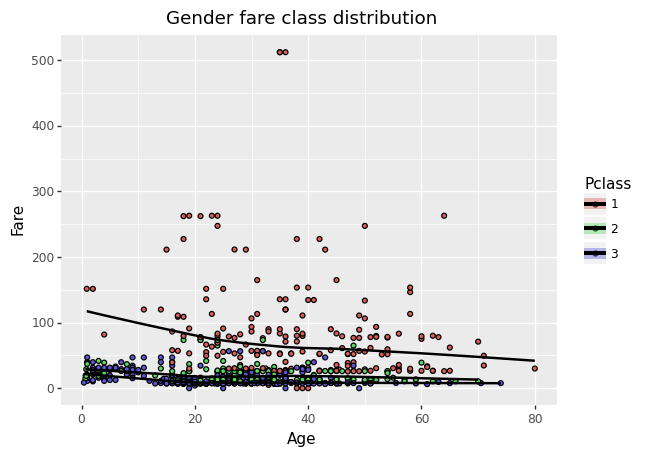

<ggplot: (8752976531871)>

In [74]:
(ggplot(df_train)
 + aes(x='Age', y='Fare', fill='Pclass')
 + geom_point()
 + stat_smooth()
 + ggtitle('Gender fare class distribution')
)

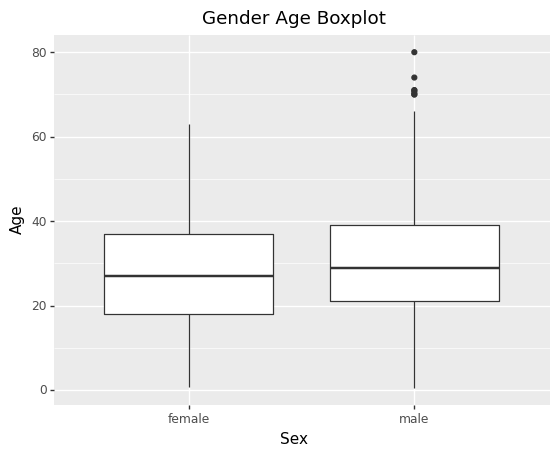

<ggplot: (8752976532351)>

In [75]:
(ggplot(df_train)
 + aes(x='Sex', y='Age')
 + geom_boxplot()
 + ggtitle('Gender Age Boxplot')
)

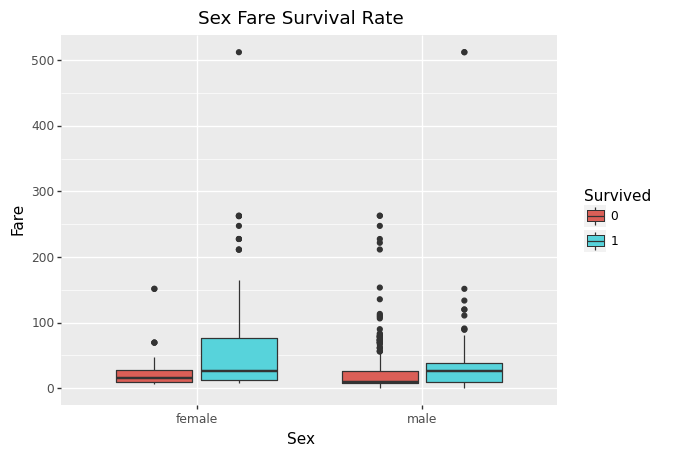

<ggplot: (8752976570323)>

In [76]:
(ggplot(df_train)
 + aes(x='Sex', y='Fare', fill='Survived')
 + geom_boxplot()
 + ggtitle('Sex Fare Survival Rate')
)

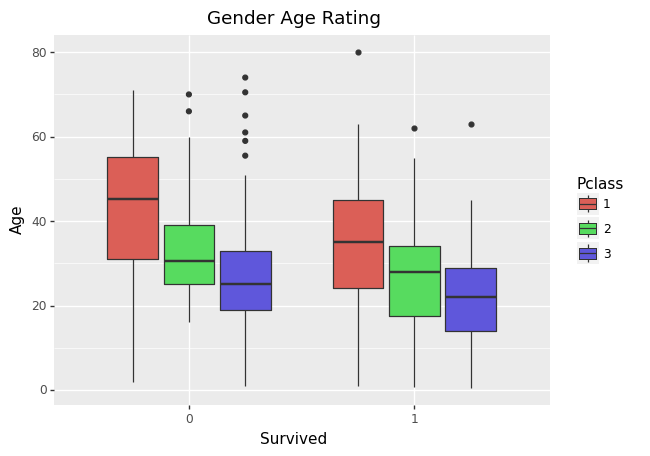

<ggplot: (8752976740458)>

In [77]:
(ggplot(df_train)
 + aes(x='Survived', y='Age', fill='Pclass')
 + geom_boxplot()
 + ggtitle('Gender Age Rating')
)

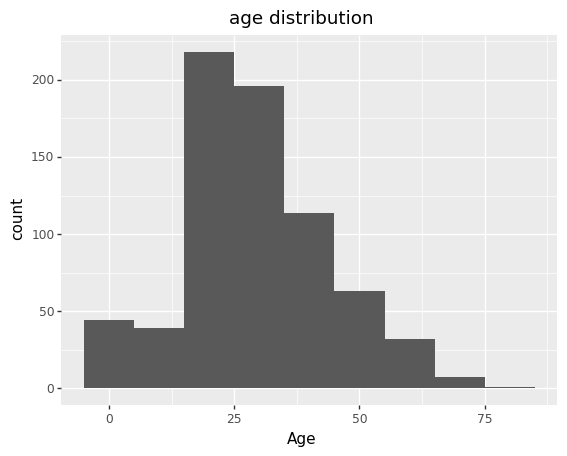

<ggplot: (8752976810945)>

In [78]:
(ggplot(df_train)
 + aes(x='Age')
 + geom_histogram(binwidth=10)
 + ggtitle('age distribution')
)

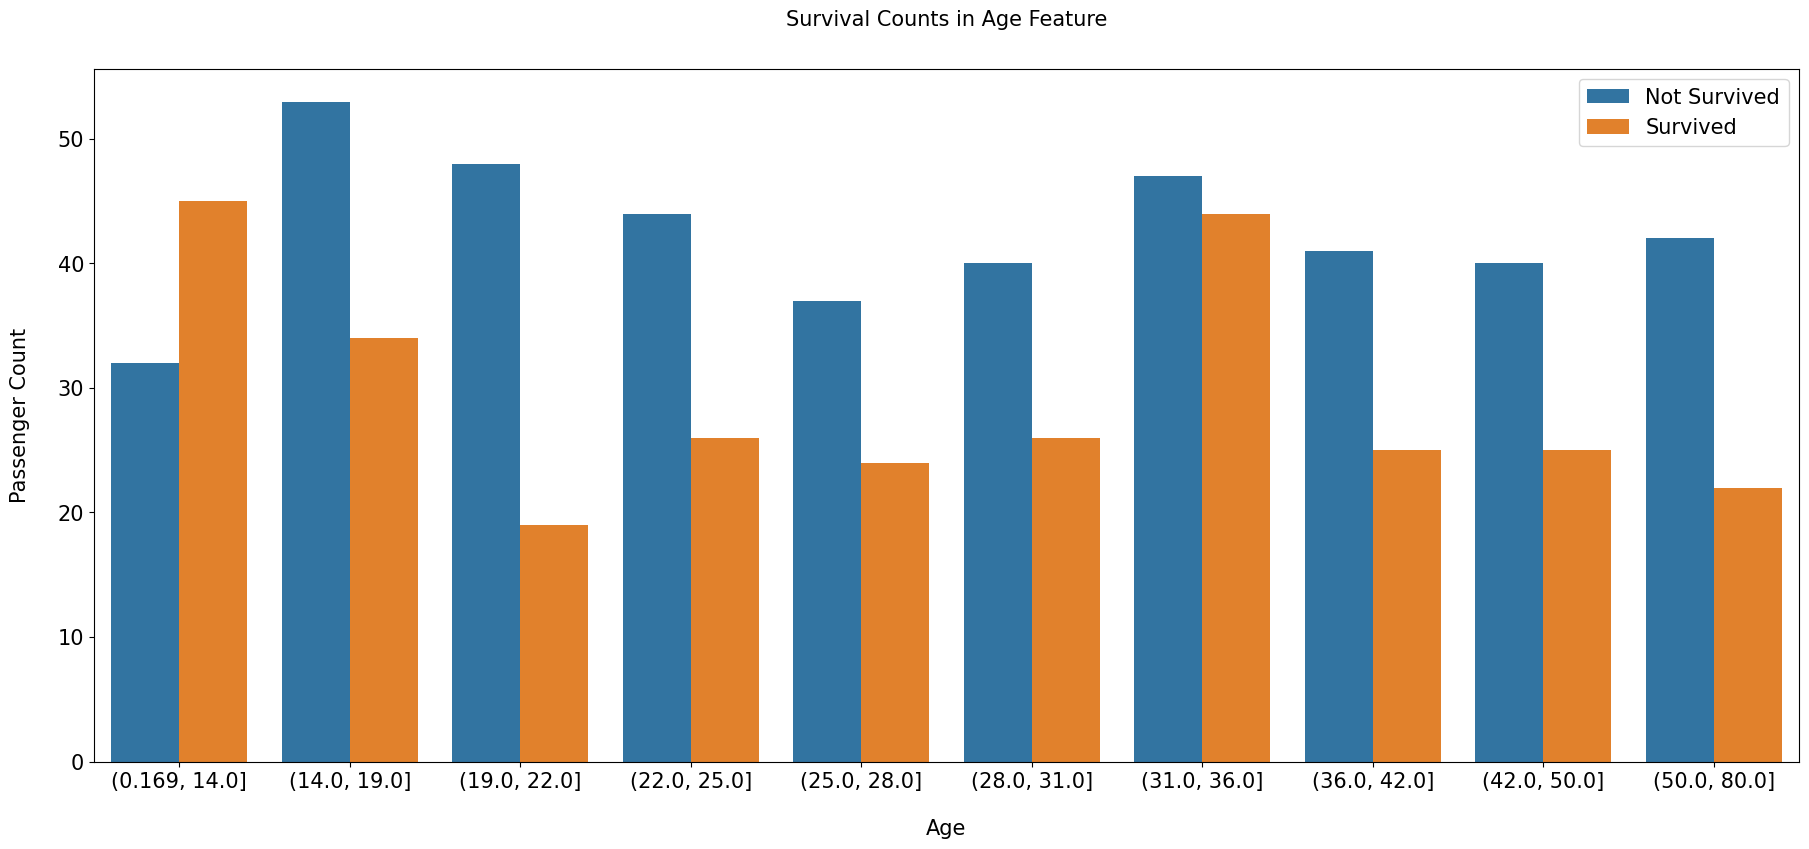

In [79]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=df_all)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

In [80]:
print('Oldest Passenger was of:',df_train['Age'].max(),'Years')
print('Youngest Passenger was of:',df_train['Age'].min(),'Years')
print('Average Age on the ship:',df_train['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [81]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [82]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
df_train.groupby('Initial')['Age'].mean()  # verificando a idade média por iniciais

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [83]:
# Preenchendo valores nulos
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46
df_train.Age.isnull().any()

False

In [84]:
print("Train Cabin missing: " + str(df_train.Cabin.isnull().sum()/len(df_train.Cabin)))
print("Test Cabin missing: " + str(df_test.Cabin.isnull().sum()/len(df_test.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [85]:
# Preenchendo valores nulos das cabines por 'N'
df_all.Cabin.fillna("N", inplace=True)

# Agrupando as cabines de acordo com a letra do nome da cabine
df_all.Cabin = [str(i)[0] for i in df_all.Cabin]



def percent_value_counts(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

percent_value_counts(df_all, "Cabin")

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [86]:
df_all.groupby("Cabin")['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [87]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a = "G"
    elif i>=16 and i<27:
        a = "F"
    elif i>=27 and i<38:
        a = "T"
    elif i>=38 and i<47:
        a = "A"
    elif i>= 47 and i<53:
        a = "E"
    elif i>= 53 and i<54:
        a = "D"
    elif i>=54 and i<116:
        a = 'C'
    else:
        a = "B"
    return a

df_all['Cabin'] = df_all.Fare.apply(lambda x: cabin_estimator(x))

percent_value_counts(df_all, "Cabin")

,Total,Percent
G,714,54.55
F,201,15.36
C,143,10.92
T,109,8.33
B,72,5.50
A,37,2.83
E,27,2.06
D,6,0.46


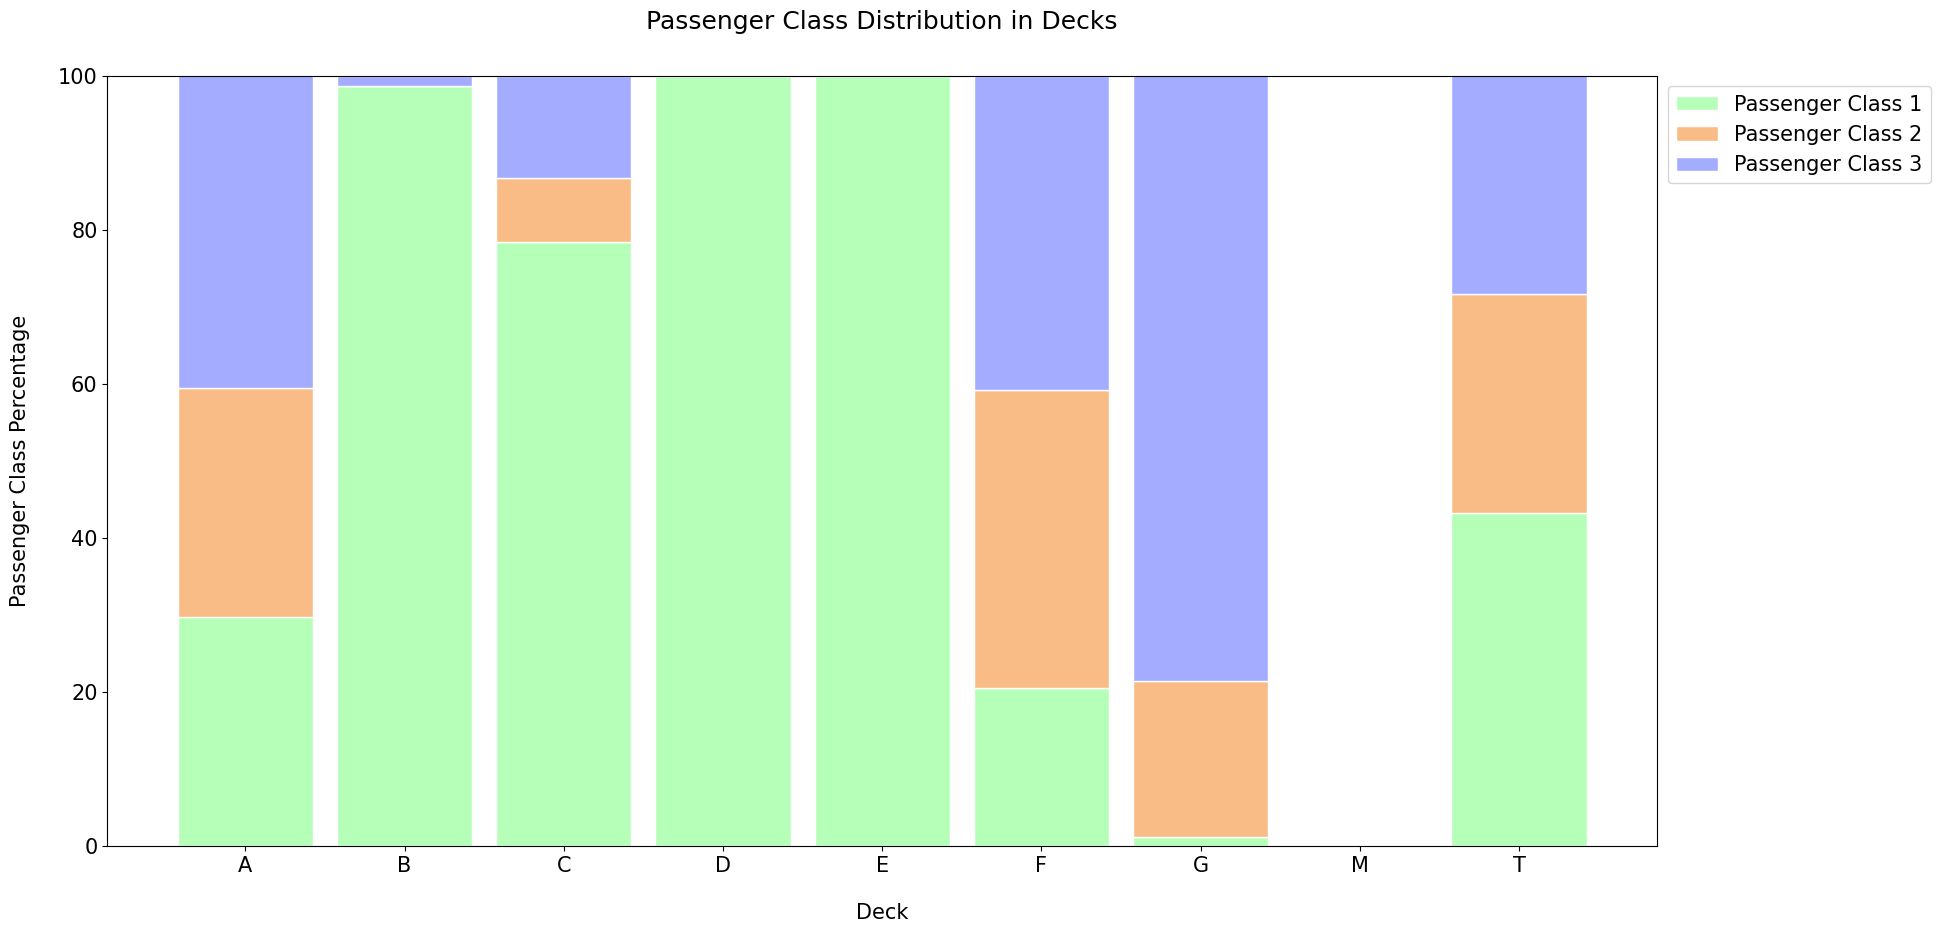

In [88]:
df_all['Deck'] = df_all['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = df_all.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch',
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):

    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]

    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count
            except KeyError:
                deck_counts[deck][pclass] = 0

    df_decks = pd.DataFrame(deck_counts)
    deck_percentages = {}

    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]

    return deck_counts, deck_percentages

def display_pclass_dist(percentages):

    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]

    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passenger Class 1')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passenger Class 2')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passenger Class 3')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Passenger Class Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Passenger Class Distribution in Decks', size=18, y=1.05)

    plt.show()

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

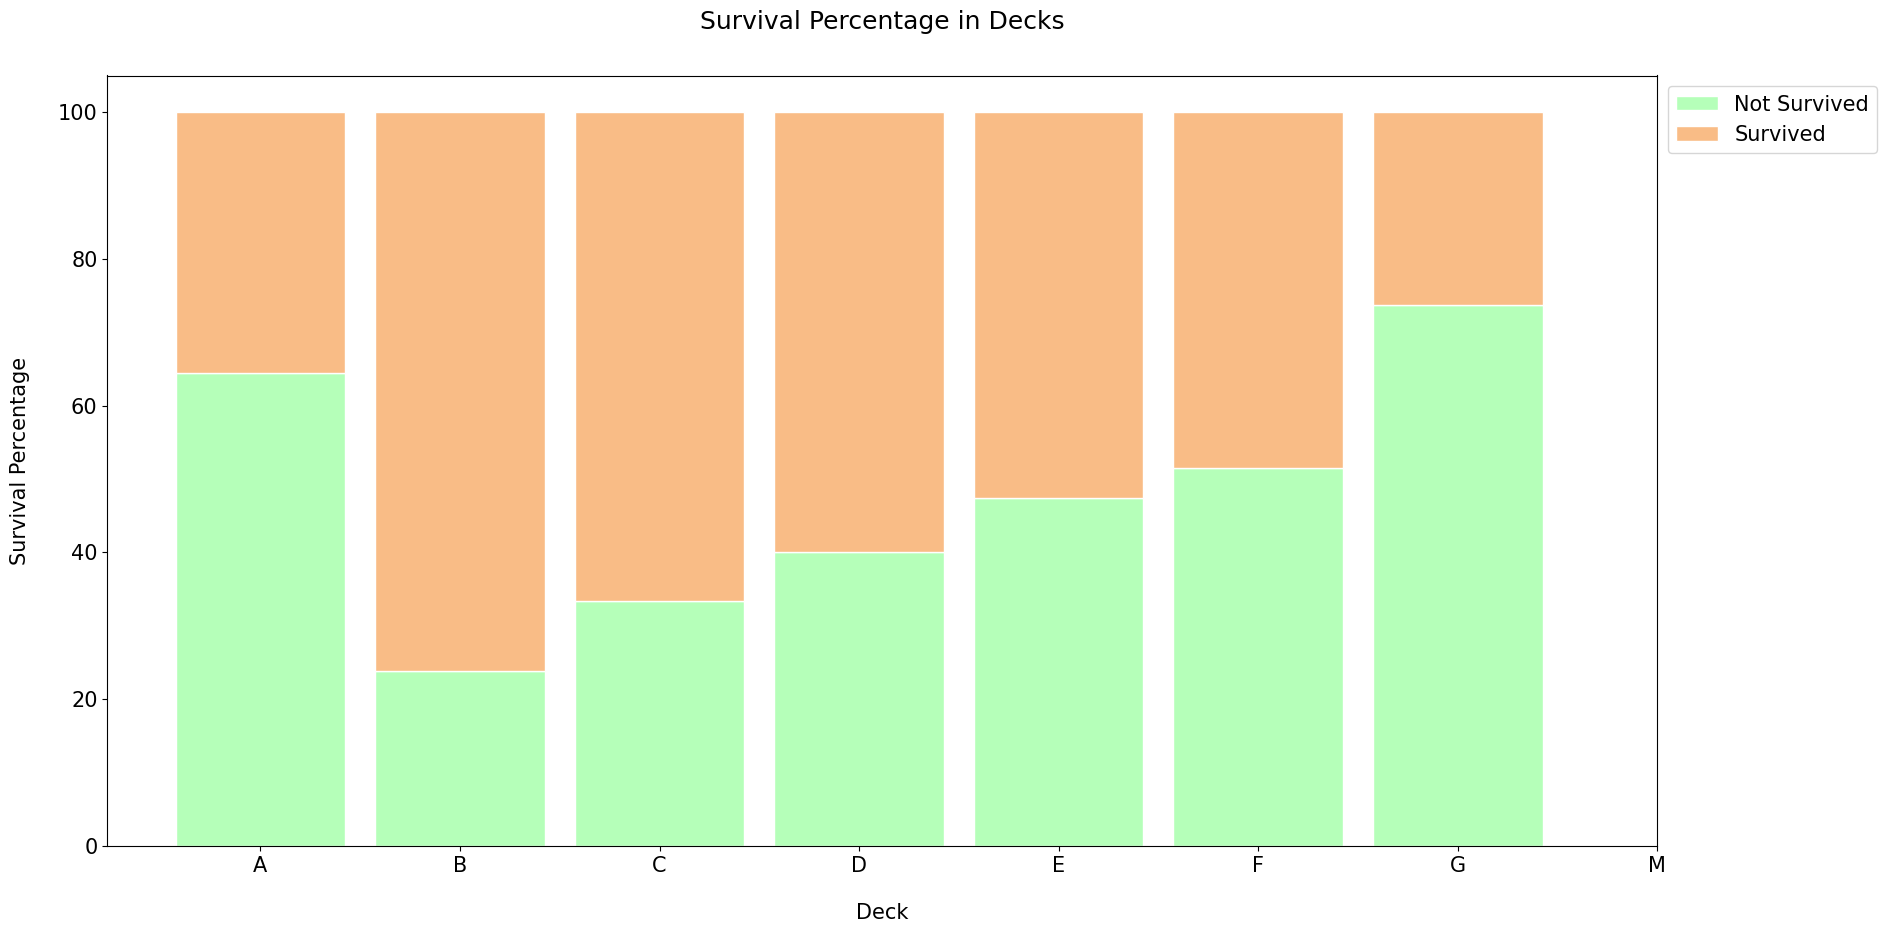

In [89]:
idx = df_all[df_all['Deck'] == 'T'].index
df_all.loc[idx, 'Deck'] = 'A'

df_all_decks_survived = df_all.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):

    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]

    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]

    return surv_counts, surv_percentages

def display_surv_dist(percentages):

    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))
    bar_width = 0.85

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]

    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Not Survived")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Survived")

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('Survival Percentage', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)

    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Survival Percentage in Decks', size=18, y=1.05)

    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

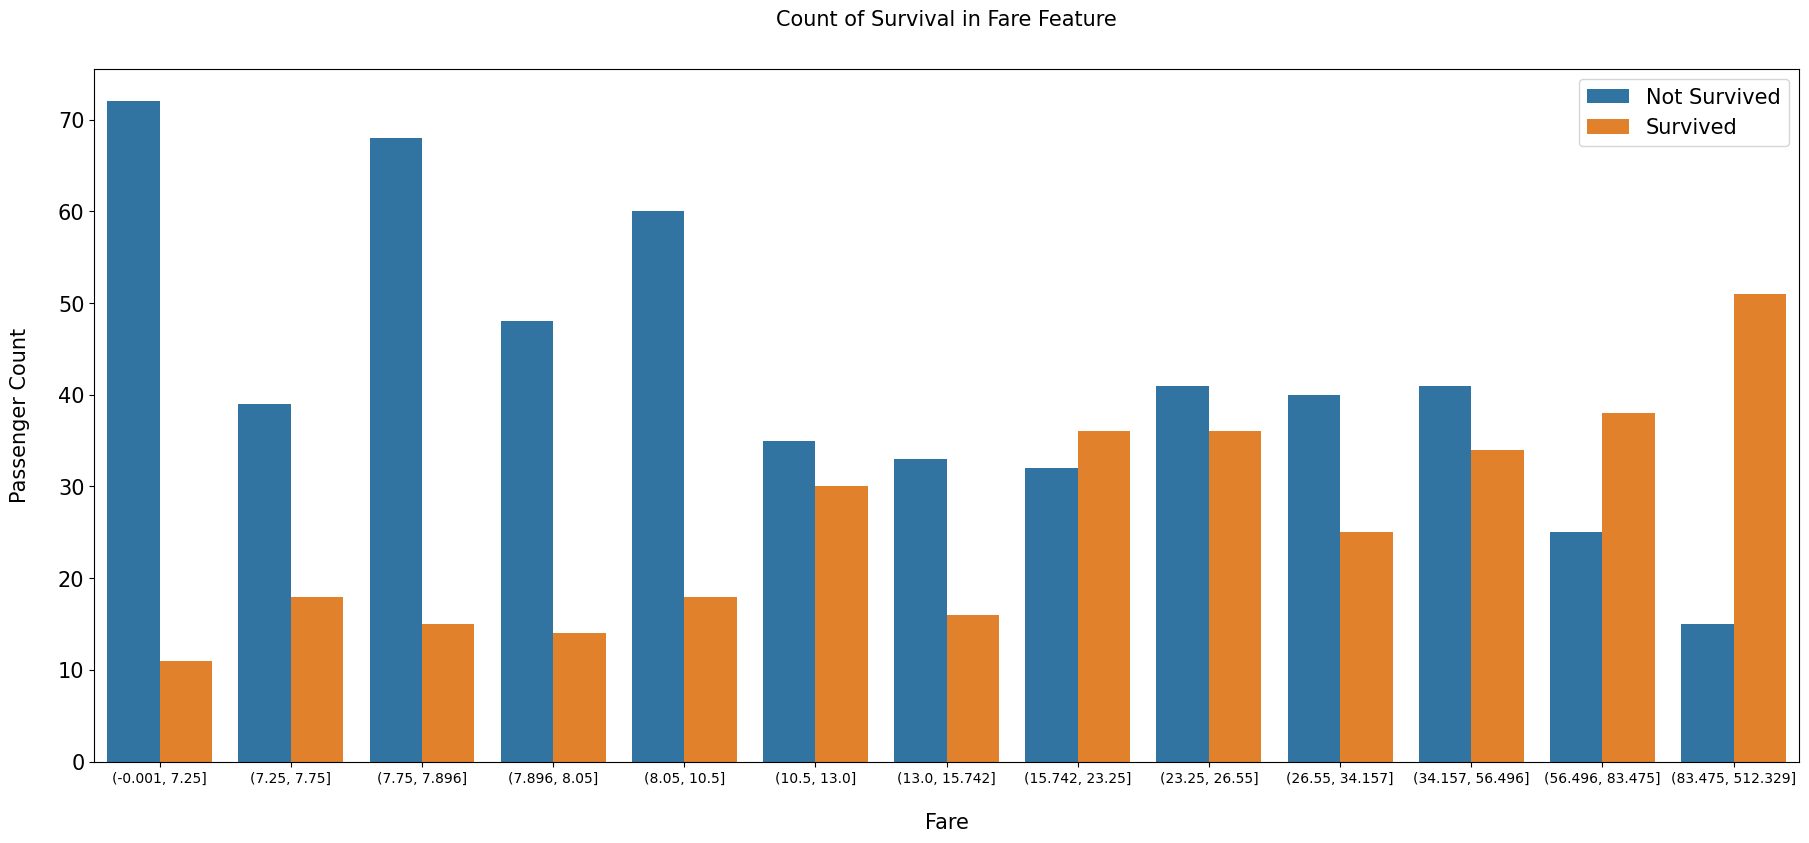

In [90]:
df_all['Fare'] = pd.qcut(df_all['Fare'], 13)
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df_all)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [91]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [92]:
df_train[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


In [93]:
df_train['Embarked'].fillna('C', inplace = True)
df_train['Embarked'].value_counts()

df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked
0,C
1,Q
2,S


In [94]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

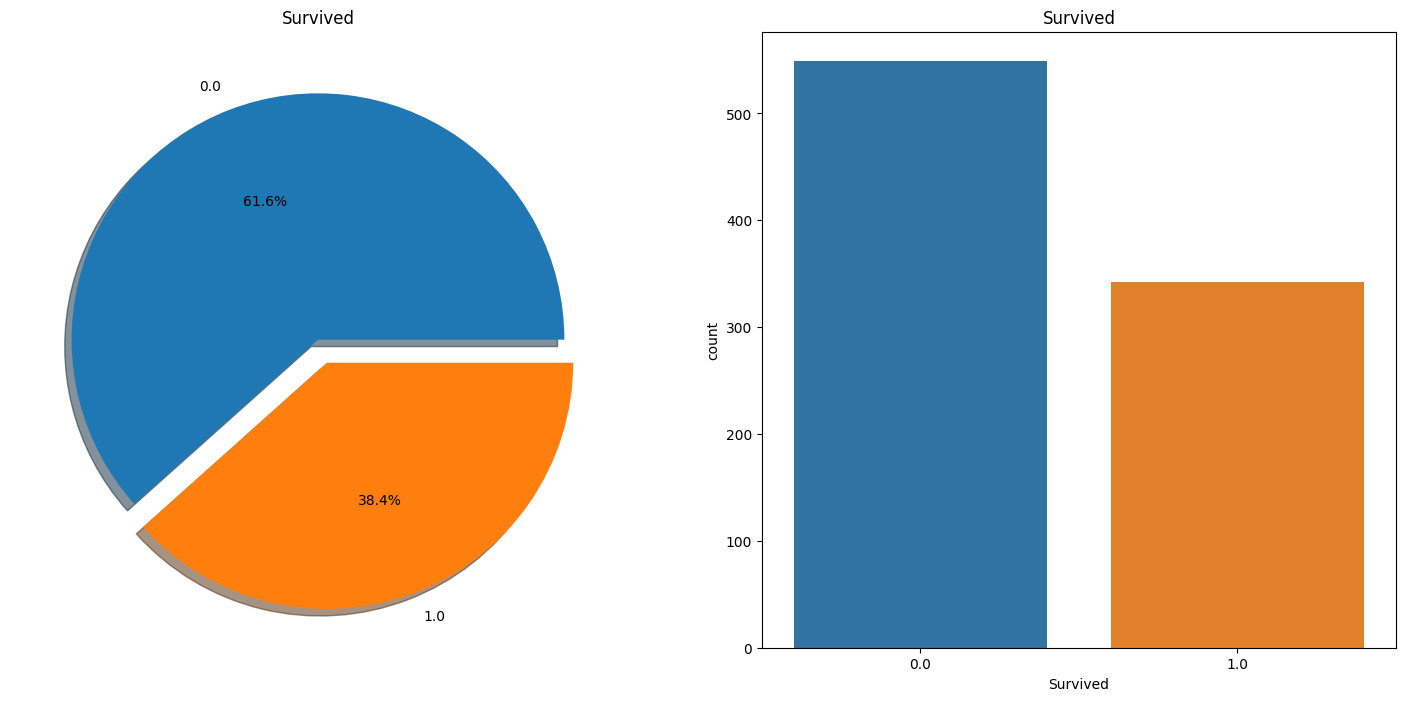

In [95]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_all['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_all, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [96]:
prediction = pd.read_csv('prediction.csv')
prediction.to_csv('prediction.csv', index=False)

In [50]:
prediction

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Breve história do Titanic

Às 23h40 (horário do navio) de 14 de abril, o vigia Frederick Fleet avistou um iceberg imediatamente à frente do Titanic e alertou a ponte. O primeiro oficial William Murdoch ordenou que o navio contornasse o obstáculo e os motores fossem invertidos, mas era tarde demais; o lado estibordo do Titanic atingiu o iceberg, criando uma série de buracos abaixo da linha d'água. O casco não foi perfurado pelo iceberg, mas amassado de tal forma que as costuras do casco se dobraram e se separaram, permitindo a entrada de água. Cinco dos compartimentos estanques do navio foram rompidos. Logo ficou claro que o navio estava condenado, pois ele não poderia sobreviver a mais de quatro compartimentos sendo inundados. O Titanic começou a afundar primeiro com a proa, com a água escorrendo de um compartimento para o outro conforme seu ângulo na água se tornava mais acentuado.

706 pessoas sobreviveram ao desastre e foram transportadas pelo Carpathia para Nova York, destino original do Titanic, e 1.517 pessoas morreram. O capitão do Carpathia descreveu o local como um campo de gelo que incluía 20 grandes icebergs medindo até 200 pés (61 m) de altura e vários icebergs menores, bem como blocos de gelo e detritos do Titanic; os passageiros descreveram estar no meio de uma vasta planície branca de gelo, repleta de icebergs. Esta área é agora conhecida como Iceberg Alley.

Menos de um terço das pessoas a bordo do Titanic sobreviveram ao desastre. Alguns sobreviventes morreram pouco depois; os ferimentos e os efeitos da exposição causaram a morte de vários dos que foram trazidos a bordo do Carpathia. Apenas 333 corpos de vítimas do Titanic foram recuperados, o que totalizou uma em cada cinco das mais de 1.500 vítimas. Alguns corpos afundaram com o navio enquanto as correntes rapidamente dispersaram corpos e destroços por centenas de quilômetros, tornando-os difíceis de recuperar. Em junho, um dos últimos navios de busca relatou que os corpos de sustentação dos coletes salva-vidas estavam se desfazendo e liberando os corpos para afundar.

# **Depois de analisar os dados, fazer correlações, construir gráficos, pesquisar sobre a história do Titanic, como era o návio, entre diversas outras informações, chegamos à seguinte conclusão:**

#### Os números mostram grandes diferenças nas taxas de sobrevivência das diferentes classes a bordo do Titanic. Embora apenas 3% das mulheres da primeira classe tenham morrido, 54% das mulheres da terceira classe morreram. Da mesma forma, cinco das seis crianças da primeira classe e todas as crianças da segunda classe sobreviveram, mas 52 das 79 crianças da terceira classe morreram. As diferenças por gênero foram ainda maiores: quase todas as tripulantes, passageiras de primeira e segunda classe foram salvas. Os homens da Primeira Classe morreram em uma taxa mais alta do que as mulheres da Terceira Classe. No total, 50% das crianças sobreviveram, 20% dos homens e 75% das mulheres.

#### Os homens tiveram a maior taxa de mortalidade, isso se da ao fato de que, no regaste, deram prioridade primeiramente à mulher e crianças e em seguida os homens.